In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Lionel Messi Goals.csv")
data.head()

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,samedi 16 f�vrier 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,samedi 22 d�cembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw


In [3]:
df = data["Goal Type"].value_counts().reset_index()
df

,Goal Type,count
0,Field goal,155
1,Penalty,82
2,Free kick,44
3,Rebound,37
4,Solo run,22


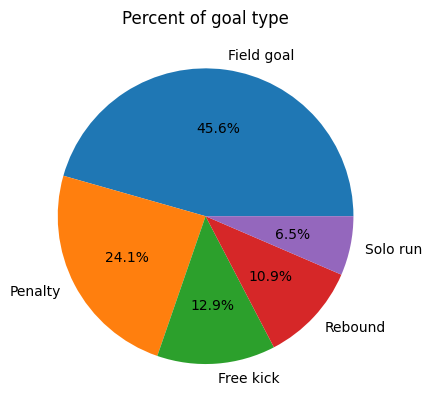

In [4]:
plt.pie(df["count"], labels = df["Goal Type"], autopct='%1.1f%%')
plt.title("Percent of goal type")
plt.show()

In [5]:
data["Minute"] = data["Minute"].apply(eval)

In [6]:
data["Minute"] = data["Minute"].astype(int)

In [7]:
df_minute = data["Minute"].value_counts().reset_index().sort_values(by=["Minute"], ascending=True)
df_minute

,Minute,count
74,3,4
87,4,3
58,5,6
85,6,3
79,7,4
...,...,...
2,92,13
84,93,3
80,94,4
93,97,1


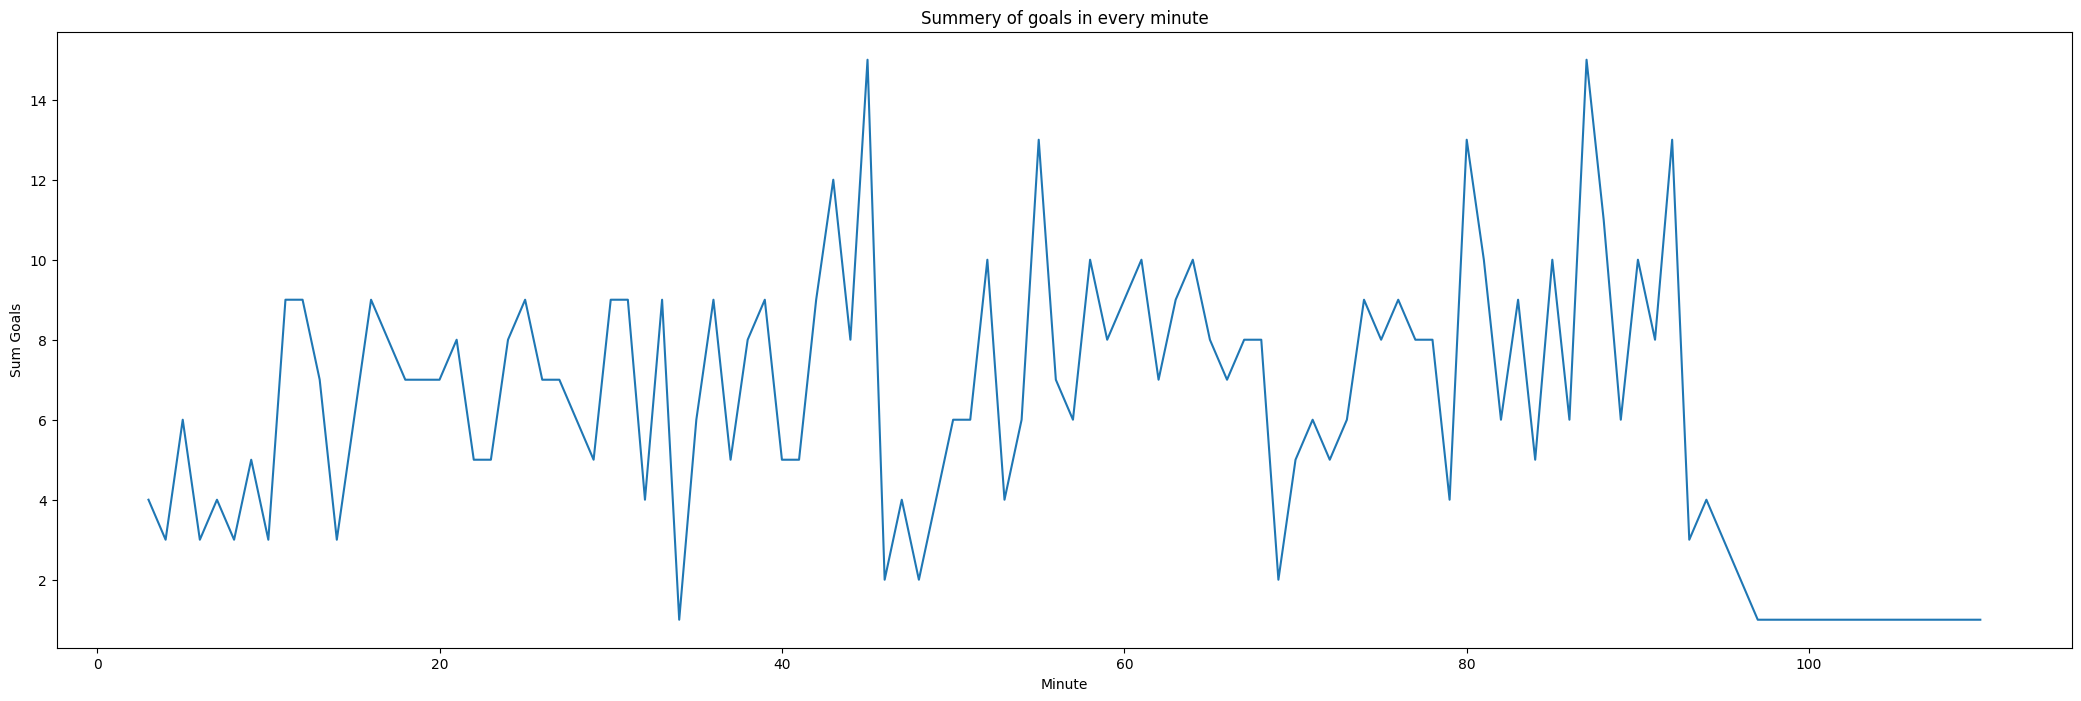

In [8]:
plt.figure(figsize=(26,8))
plt.plot(df_minute["Minute"], df_minute["count"])
plt.title("Summery of goals in every minute")
plt.xlabel("Minute")
plt.ylabel("Sum Goals")
plt.show()

In [9]:
data['Year'] = data['Date'].apply(lambda x: x.split()[-1])
df = data.drop(columns=['Date'])
df.head()

,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result,Year
0,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won,2019
1,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won,2019
2,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won,2018
3,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won,2018
4,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw,2018


In [10]:
df['Total Goal'] = df['Score Home Team - When Messi Scored'] + df['Score Away Team - When Messi Scored']
df.head()

,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result,Year,Total Goal
0,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won,2019,1
1,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won,2019,2
2,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won,2018,2
3,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won,2018,2
4,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw,2018,1


In [11]:
df_goal = df.groupby('Year')["Total Goal"].sum().reset_index().sort_values(by="Year", ascending=True)
df_goal

,Year,Total Goal
0,2005,7
1,2006,38
2,2007,83
3,2008,56
4,2009,111
5,2010,156
6,2011,156
7,2012,280
8,2013,118
9,2014,177


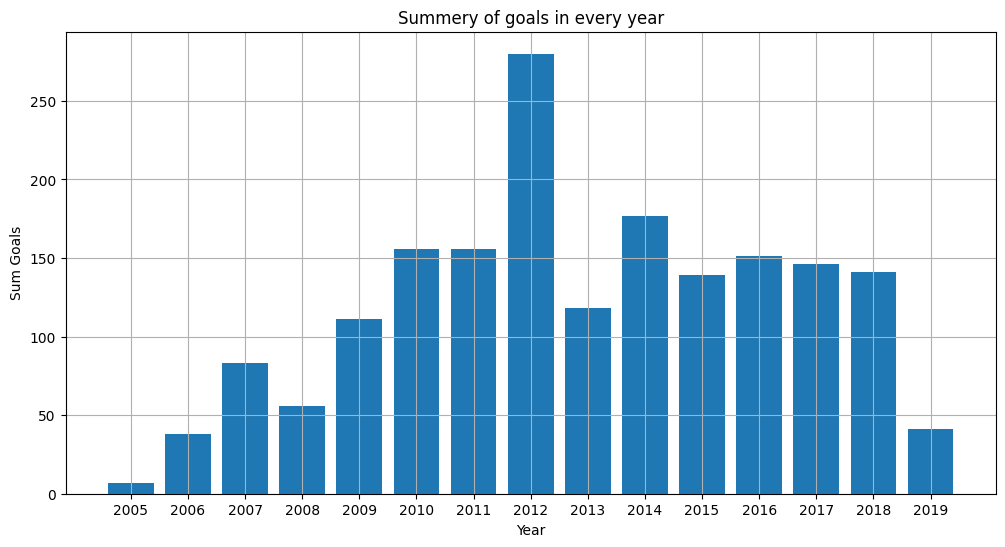

In [12]:
plt.figure(figsize=(12,6))
plt.bar(df_goal["Year"], df_goal["Total Goal"])
plt.title("Summery of goals in every year")
plt.xlabel("Year")
plt.ylabel("Sum Goals")
plt.grid()
plt.show()

Penalty goals method

In [13]:
penalty_goals = data[data['Goal Type'] == 'Penalty']
penalty_goals_by_method = penalty_goals['Goal Method'].value_counts().reset_index()

penalty_goals_by_method.columns = ['Foot Used', 'Count']
penalty_goals_by_method

,Foot Used,Count
0,Left foot,82


Percentage won

In [14]:
data['Minute'] = data['Minute'].astype(str).apply(lambda x: int(x.split('+')[0]) if '+' in x else int(x))
extra_time_goals = data[data['Minute'] > 90]
games_won_in_extra_time = extra_time_goals[extra_time_goals['Final Game Result'] == 'Won'].shape[0]
total_extra_time_games = extra_time_goals.shape[0]
percentage_won = (games_won_in_extra_time / total_extra_time_games) * 100 if total_extra_time_games > 0 else 0
percentage_won


90.0